In [23]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import csv
import sys
sys.path.append("..")

from Code.VQLSSVM import VQLSSVM
from Code.Utils import prepareDataset

np.set_printoptions(precision=4, suppress=True)

In [24]:
qubits = 3
shots: int = 10000
gamma: float = 0.01 # regularization parameter
subsetSize: int = 2**qubits - 1 # number of training points
classToFilterOut: int = 2

In [25]:
xTrain, xTest, yTrain, yTest = prepareDataset(normalizeValues=True, dataset="iris",subsetSize=subsetSize, classToFilterOut=classToFilterOut)
print(xTrain)
print(yTrain)

[[-0.4074  0.4167 -0.7561 -0.6471]
 [-0.4815  0.3333 -0.8049 -0.8824]
 [ 0.037  -0.1667  0.561   0.2941]
 [-0.7778  0.     -0.8049 -0.8824]
 [ 0.2593  0.1667  0.7073  0.7647]
 [-0.4815 -0.75    0.122   0.0588]
 [ 0.4815 -0.75    0.6585  0.4118]]
[-1 -1  1 -1  1  1  1]


# VQLS-LSSVM state vectors

Condition number of the matrix:  1541.7324911607177
LS-SVM Matrix:
 [[  0.       1.       1.       1.       1.       1.       1.       1.    ]
 [  1.     101.33     1.5145  -0.699    1.4964  -1.0658  -0.2466  -1.273 ]
 [  1.       1.5145 101.7693  -0.7844   1.8009  -1.3133  -0.1682  -1.3752]
 [  1.      -0.699   -0.7844 100.4303  -0.7398   0.6035   0.1929   0.6334]
 [  1.       1.4964   1.8009  -0.7398 102.0313  -1.4457   0.2244  -1.2678]
 [  1.      -1.0658  -1.3133   0.6035  -1.4457 101.1801  -0.1186   0.7805]
 [  1.      -0.2466  -0.1682   0.1929   0.2244  -0.1186 100.8127   0.4352]
 [  1.      -1.273   -1.3752   0.6334  -1.2678   0.7805   0.4352 101.3975]]
['III', 'IIX', 'IIZ', 'IXI', 'IXX', 'IXZ', 'IYY', 'IZI', 'IZX', 'IZZ',
 'XII', 'XIX', 'XIZ', 'XXI', 'XXX', 'XXZ', 'XYY', 'XZI', 'XZX', 'XZZ',
 'YIY', 'YXY', 'YYI', 'YYX', 'YYZ', 'YZY', 'ZII', 'ZIX', 'ZIZ', 'ZXI',
 'ZXX', 'ZXZ', 'ZYY', 'ZZI', 'ZZX', 'ZZZ']
Pauli matrix coeffitients [(88.61890011065935+0j), (-0.1987262282191232+0j)

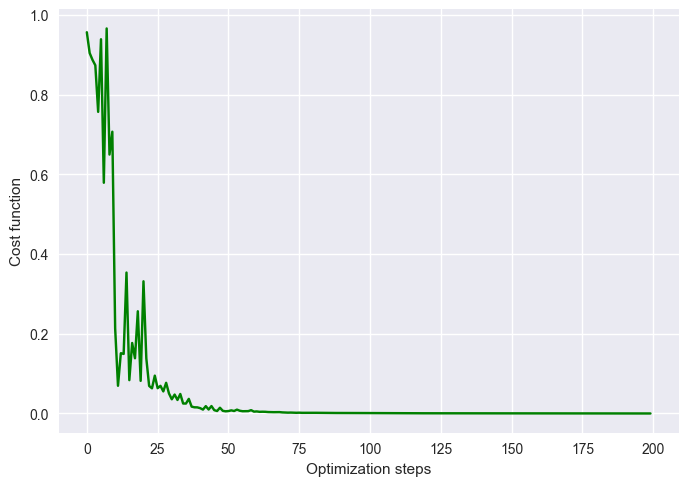

In [26]:
vqlssvmVectors: VQLSSVM = VQLSSVM(gamma, shots)
vqlssvmVectors.train(xTrain, yTrain, quantumSimulation=False, verbose=True, iterations = 200, method="COBYLA", threads=4, jobs=4)
vqlssvmVectors.plotCost()

In [27]:
print(vqlssvmVectors.predict(xTest))

[ 0.0587+0.j  0.064 +0.j -0.0694+0.j  0.0615+0.j -0.0518+0.j -0.0596+0.j
 -0.0522+0.j  0.0892+0.j  0.0448+0.j  0.0492+0.j  0.0553+0.j  0.0362+0.j
 -0.0762+0.j -0.0561+0.j  0.0234+0.j -0.0607+0.j  0.0453+0.j  0.0797+0.j
  0.0502+0.j  0.0285+0.j -0.0505+0.j -0.0489+0.j  0.0613+0.j  0.0778+0.j
 -0.0752+0.j  0.0436+0.j -0.0617+0.j  0.0559+0.j -0.0595+0.j -0.0617+0.j
  0.0463+0.j  0.0548+0.j  0.0453+0.j -0.0801+0.j -0.0856+0.j -0.0623+0.j
  0.0709+0.j -0.0677+0.j -0.0683+0.j  0.0514+0.j  0.0625+0.j -0.0523+0.j
  0.053 +0.j -0.0529+0.j -0.0464+0.j -0.0434+0.j -0.0484+0.j  0.0536+0.j
  0.0403+0.j -0.0679+0.j -0.0559+0.j  0.036 +0.j  0.0454+0.j -0.0881+0.j
 -0.0264+0.j -0.0554+0.j  0.0515+0.j -0.0643+0.j  0.0457+0.j -0.056 +0.j
 -0.0628+0.j -0.0627+0.j  0.0519+0.j  0.0578+0.j -0.0568+0.j -0.051 +0.j
 -0.0519+0.j  0.061 +0.j -0.0647+0.j  0.0562+0.j -0.0602+0.j -0.0888+0.j
  0.0502+0.j  0.0302+0.j -0.062 +0.j -0.0657+0.j  0.0779+0.j  0.0864+0.j
  0.0478+0.j  0.0486+0.j -0.0678+0.j  0.0648+0.j -0

In [28]:
print("Accuracy:",vqlssvmVectors.accuracy(xTest, yTest))

Accuracy: 1.0


# VQLS-LSSVM quantum

Condition number of the matrix:  1541.7324911607177
LS-SVM Matrix:
 [[  0.       1.       1.       1.       1.       1.       1.       1.    ]
 [  1.     101.33     1.5145  -0.699    1.4964  -1.0658  -0.2466  -1.273 ]
 [  1.       1.5145 101.7693  -0.7844   1.8009  -1.3133  -0.1682  -1.3752]
 [  1.      -0.699   -0.7844 100.4303  -0.7398   0.6035   0.1929   0.6334]
 [  1.       1.4964   1.8009  -0.7398 102.0313  -1.4457   0.2244  -1.2678]
 [  1.      -1.0658  -1.3133   0.6035  -1.4457 101.1801  -0.1186   0.7805]
 [  1.      -0.2466  -0.1682   0.1929   0.2244  -0.1186 100.8127   0.4352]
 [  1.      -1.273   -1.3752   0.6334  -1.2678   0.7805   0.4352 101.3975]]
['III', 'IIX', 'IIZ', 'IXI', 'IXX', 'IXZ', 'IYY', 'IZI', 'IZX', 'IZZ',
 'XII', 'XIX', 'XIZ', 'XXI', 'XXX', 'XXZ', 'XYY', 'XZI', 'XZX', 'XZZ',
 'YIY', 'YXY', 'YYI', 'YYX', 'YYZ', 'YZY', 'ZII', 'ZIX', 'ZIZ', 'ZXI',
 'ZXX', 'ZXZ', 'ZYY', 'ZZI', 'ZZX', 'ZZZ']
Pauli matrix coeffitients [(88.61890011065935+0j), (-0.1987262282191232+0j)

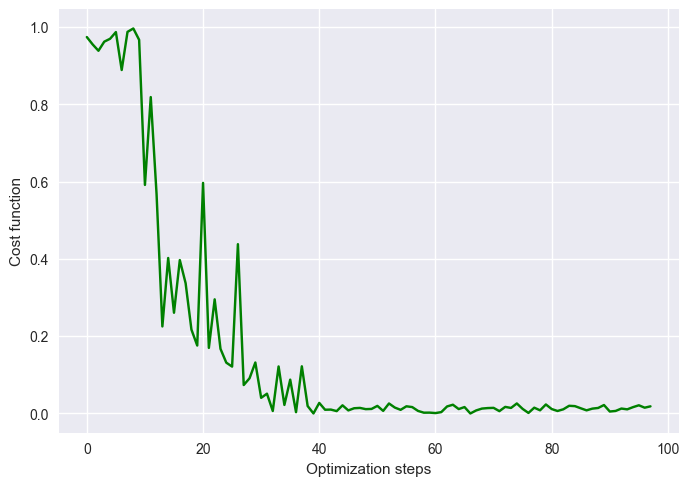

In [29]:
vqlssvmQuantum: VQLSSVM = VQLSSVM(gamma, shots)
vqlssvmQuantum.train(xTrain, yTrain, quantumSimulation=True, verbose=True, iterations = 200, threads=4, jobs=4)

vqlssvmQuantum.plotCost()

In [30]:
costCOBYLA = vqlssvmQuantum.getCostHistory()

with open('../SimulationResults/costCOBYLA.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['Iteration', 'CostFunction'])
    for i in range(len(costCOBYLA)):
        writer.writerow([i, costCOBYLA[i]])


In [31]:
print("Predictions:\n", vqlssvmQuantum.predict(xTest))
print("Accuracy: ", vqlssvmQuantum.accuracy(xTest, yTest))

Predictions:
 [ 0.0562+0.j  0.0596+0.j -0.0628+0.j  0.063 +0.j -0.0435+0.j -0.0494+0.j
 -0.0378+0.j  0.0924+0.j  0.0446+0.j  0.0562+0.j  0.0539+0.j  0.0422+0.j
 -0.0727+0.j -0.0505+0.j  0.0311+0.j -0.0517+0.j  0.0487+0.j  0.0789+0.j
  0.0532+0.j  0.038 +0.j -0.0385+0.j -0.0364+0.j  0.0606+0.j  0.0758+0.j
 -0.0661+0.j  0.0449+0.j -0.0577+0.j  0.0554+0.j -0.0485+0.j -0.0523+0.j
  0.0449+0.j  0.0594+0.j  0.0531+0.j -0.0768+0.j -0.0763+0.j -0.0548+0.j
  0.0659+0.j -0.0579+0.j -0.065 +0.j  0.0554+0.j  0.0573+0.j -0.0388+0.j
  0.0529+0.j -0.0404+0.j -0.039 +0.j -0.0313+0.j -0.0365+0.j  0.0554+0.j
  0.0436+0.j -0.0616+0.j -0.048 +0.j  0.037 +0.j  0.0502+0.j -0.0889+0.j
 -0.0088+0.j -0.0429+0.j  0.0473+0.j -0.0566+0.j  0.0477+0.j -0.0445+0.j
 -0.0546+0.j -0.0528+0.j  0.0463+0.j  0.0567+0.j -0.047 +0.j -0.0392+0.j
 -0.0451+0.j  0.0671+0.j -0.06  +0.j  0.0526+0.j -0.051 +0.j -0.0861+0.j
  0.0621+0.j  0.0321+0.j -0.0503+0.j -0.0507+0.j  0.0724+0.j  0.0871+0.j
  0.047 +0.j  0.0546+0.j -0.0597+0.j 

# LSSVM (work in progresss)

In [32]:
# lssvmMatrix1: np.ndarray = lssvmMatrix(xTrain, gamma, "linearKernel")
# yVector: np.array = prepareLabels(yTrain)
# print(yVector)
# print ("Condition number of the matrix: ", np.linalg.cond(lssvmMatrix1))
# print("LS-SVM Matrix:\n", lssvmMatrix1)
# print(yVector)

# solution: np.array = np.linalg.solve(lssvmMatrix1, yVector)
# print("Solution:", solution)
# print ("Norm of the solution: ",solution/np.linalg.norm(solution))

# bias: float = solution[0]
# weights: np.array = solution[1:]

# vqlssvmLSSVM: VQLSSVM = VQLSSVM(gamma,10)
# vqlssvmLSSVM.xTrain = xTrain
# vqlssvmLSSVM.xTrainSize = xTrain.shape[0]
# vqlssvmLSSVM.weights = weights
# vqlssvmLSSVM.b = bias
# predictions: np.array = vqlssvmLSSVM.predict(xTest)
# classVals = [vqlssvmLSSVM.assignClass(i) for i in predictions]
# print("Predictions:", predictions)
# print("Class values:", classVals)
# print("yTest:", yTest)
# # print(yTest)
# print("Accuracy:", vqlssvmLSSVM.accuracy(xTest, yTest))

# Classical SVM

In [33]:
clf = SVC(kernel='linear')
clf.fit(xTrain, yTrain)
yPred = clf.predict(xTest)
print("Accuracy:", accuracy_score(yTest, yPred))

Accuracy: 1.0
